In [3]:
rm(list = ls())         # Remove all objects from the workspace
graphics.off()          # Close all open graphics devices

# Load required libraries
library(settings)       # For resetting global options
reset(options)          # Reset all global options to default values

library(nlmeU)          # For datasets
library(nlme)           # For model implementation
library(lattice)        # For lattice plotting
library(corrplot)       # For correlation matrix visualization
library(plot.matrix)    # For matrix plots
library(MASS)           # For statistical functions
library(car)            # For regression diagnostics
library(lme4)           # For mixed-effects models
library(insight)        # For model insight extraction
library(rgeoda)         # For geospatial analysis
library(sf)             # For handling spatial data
library(sp)             # For spatial data management
library(gstat)          # For geostatistical analysis
library(geoR)           # For geostatistical modeling
library(geojsonio)
library(KFAS)
library(HMM)

#set.seed(????)

# Set working directory
setwd("/Users/amirh_jandaghian/Documents/")

In [47]:
data  <- read.table('/Users/amirh_jandaghian/Downloads/AS Exam/birds.txt')
head(data)

,x,y,elevation,vegetation_type,birds
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,5144222,428721.2,2.115,O,6.0
2,5143408,429263.6,2.030,D,4.3
3,5139747,432246.6,2.633,D,4.9
4,5143680,427365.3,2.024,W,7.6
5,5143951,428585.6,2.258,D,4.1
6,5140425,427229.7,7.384,W,18.6


In [9]:
States = c('F', 'R')
Symbols = c(1, 2, 3)
observations = c(3, 3, 1, 1, 3, 3, 3, 2, 1, 3, 2, 1, 3, 3, 1, 1, 1, 2, 3, 1, 1, 1)

transProbs = matrix( c(0.6, 0.3, 
                        0.4,  0.7), 2)

emissProbs = matrix( c(0.1, 0.6, 
                        0.2, 0.3,
                        0.7, 0.1), 2)

In [11]:
transProbs

emissProbs

0.6,0.4
0.3,0.7


0.1,0.2,0.7
0.6,0.3,0.1


In [12]:
hmm = initHMM(States, Symbols, c(0.5, 0.5), transProbs, emissProbs)
hmm

$States
[1] "F" "R"

$Symbols
[1] 1 2 3

$startProbs
  F   R 
0.5 0.5 

$transProbs
    to
from   F   R
   F 0.6 0.4
   R 0.3 0.7

$emissionProbs
      symbols
states   1   2   3
     F 0.1 0.2 0.7
     R 0.6 0.3 0.1

In [17]:
viterbi(hmm, observations) # we get the most probable path of hidden states

[1] "F" "F" "R" "R" "F" "F" "F" "R" "R" "F" "R" "R" "F" "F" "R" "R" "R" "R" "F"
[20] "R" "R" "R"

In [38]:
HMM = baumWelch(hmm, observations, maxIterations=100, delta=1E-9)
HMM

$hmm
$hmm$States
[1] "F" "R"

$hmm$Symbols
[1] 1 2 3

$hmm$startProbs
  F   R 
0.5 0.5 

$hmm$transProbs
    to
from         F         R
   F 0.3005598 0.6994402
   R 0.0152660 0.9847340

$hmm$emissionProbs
      symbols
states            1            2         3
     F 1.142028e-19 5.840425e-17 1.0000000
     R 4.886459e-01 1.465938e-01 0.3647604


$difference
  [1] 0.304215154 0.061696725 0.046076197 0.038225422 0.034266684 0.031922738
  [7] 0.030196306 0.028725842 0.027388274 0.026142141 0.024974300 0.023881580
 [13] 0.022863842 0.021921115 0.021052442 0.020255533 0.019526805 0.018861620
 [19] 0.018254581 0.017699855 0.017191450 0.016723463 0.016290260 0.015886617
 [25] 0.015507799 0.015149611 0.014808410 0.014481086 0.014165041 0.013858137
 [31] 0.013558654 0.013265230 0.012976815 0.012692613 0.012412037 0.012134669
 [37] 0.011860215 0.011588481 0.011319344 0.011052732 0.010788613 0.010526982
 [43] 0.010267856 0.010011275 0.009757294 0.009505990 0.009257455 0.009011801
 [49] 0.008769158 0.008529668 0.008293487 0.008060780 0.007831715 0.007606460
 [55] 0.007385181 0.007168031 0.006955157 0.006746688 0.006542737 0.006343399
 [61] 0.006148753 0.005958855 0.005773745 0.005593445 0.005417960 0.005247279
 [67] 0.005081377 0.004920215 0.004763743 0.004611900 0.004464616 0.004321810
 [73] 0.004183398 0.004049286 0.003919377 0.003793567 0.003671750 0.003553816
 [79] 0.003439654 0.003329148 0.003222186 0.003118650 0.003018425 0.002921397
 [85] 0.002827452 0.002736476 0.002648361 0.002562998 0.002480281 0.002400110
 [91] 0.002322385 0.002247012 0.002173899 0.002102960 0.002034113 0.001967277
 [97] 0.001902381 0.001839352 0.001778126 0.001718641

In [43]:
head(data)

,x,y,elevation,vegetation_type,birds
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,5144222,428721.2,2.115,O,6.0
2,5143408,429263.6,2.030,D,4.3
3,5139747,432246.6,2.633,D,4.9
4,5143680,427365.3,2.024,W,7.6
5,5143951,428585.6,2.258,D,4.1
6,5140425,427229.7,7.384,W,18.6


In [48]:
coordinates(data)=c('x','y')

In [49]:
#attach(data)
#coordinates(data)=c('X','Y')
head(data) # --> correctly imported

          coordinates elevation vegetation_type birds
1 (5144222, 428721.2)     2.115               O   6.0
2 (5143408, 429263.6)     2.030               D   4.3
3 (5139747, 432246.6)     2.633               D   4.9
4 (5143680, 427365.3)     2.024               W   7.6
5 (5143951, 428585.6)     2.258               D   4.1
6 (5140425, 427229.7)     7.384               W  18.6

In [ ]:
an exponential variogram without nugget e!ect
 Notice that no constant intercept should be included.
 Report a plot of the fitted variogram, initialising the variogram fit with the model vgm(0.25, "Exp", 1000).
Indicate the estimate of the range and the sill.

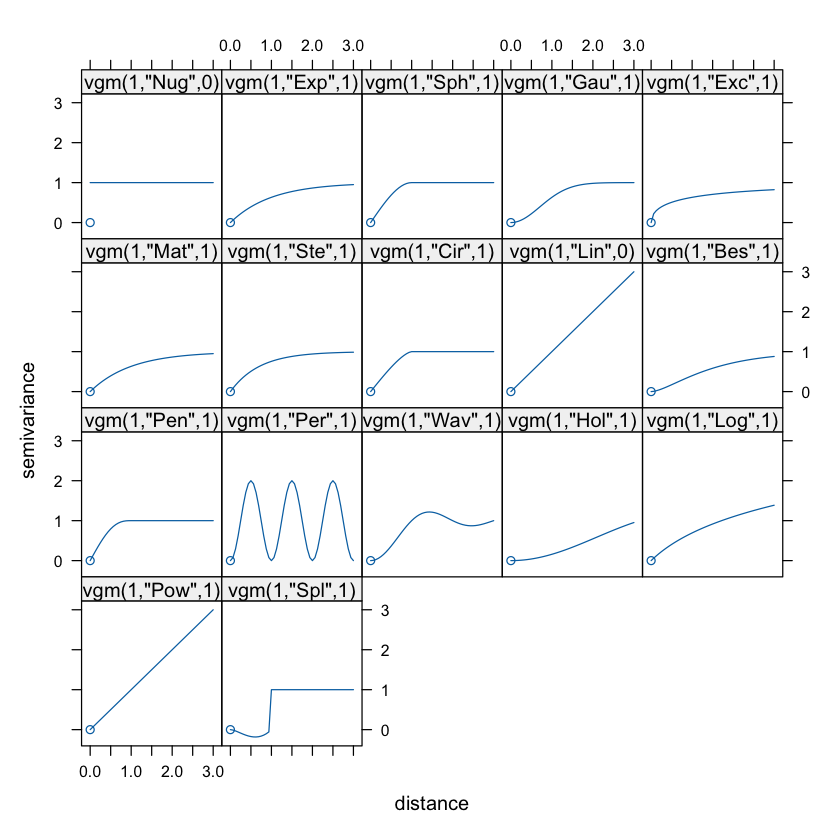

In [62]:
show.vgms() 

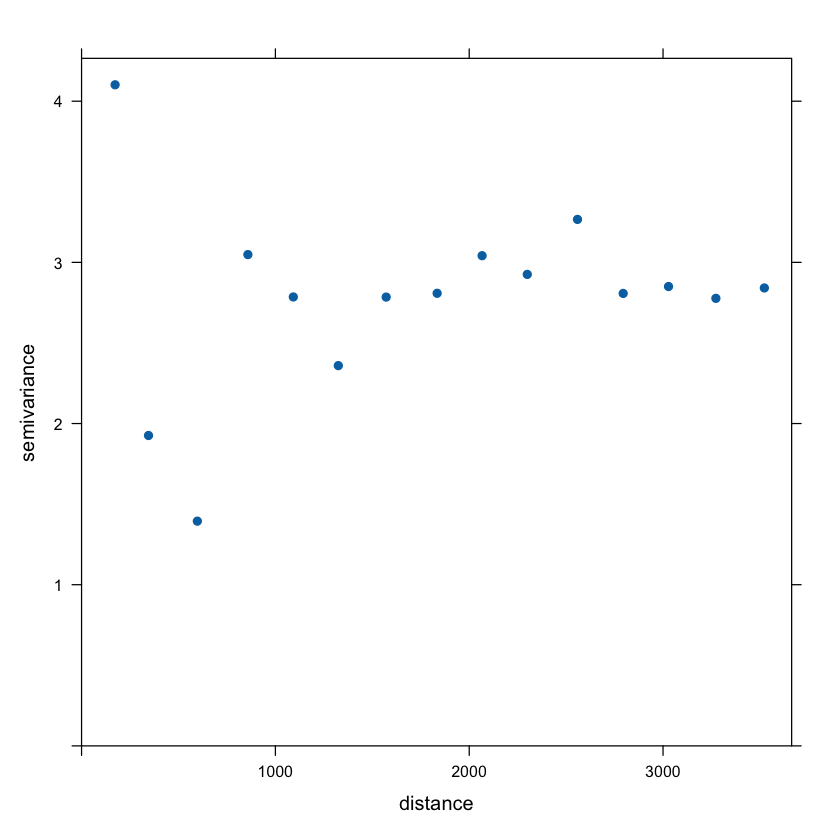

In [94]:
v.t=variogram(birds ~ elevation , data=data) 
plot(v.t,pch=19)


Warning message in fit.variogram(v.t, vgm(0.25, "Exp", 1000)):
"No convergence after 200 iterations: try different initial values?"


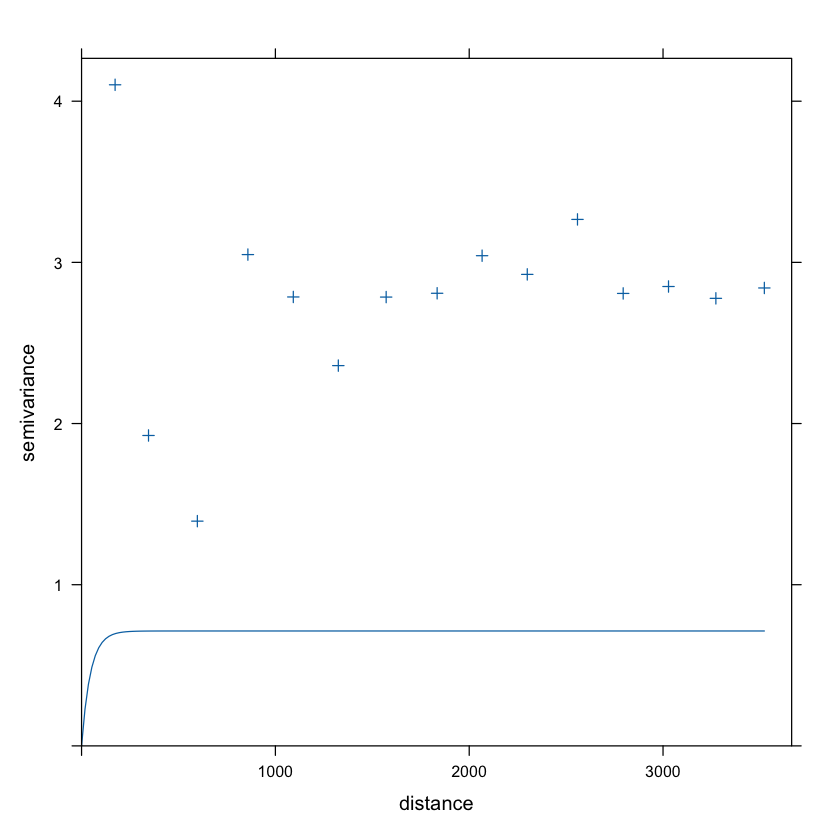

In [79]:
v.fit <- fit.variogram(v.t, vgm(0.25, "Exp", 1000))
plot(v.t, v.fit, pch = 3)

Warning message in fit.variogram(v.t, vgm(3, "Exp", 1000)):
"No convergence after 200 iterations: try different initial values?"


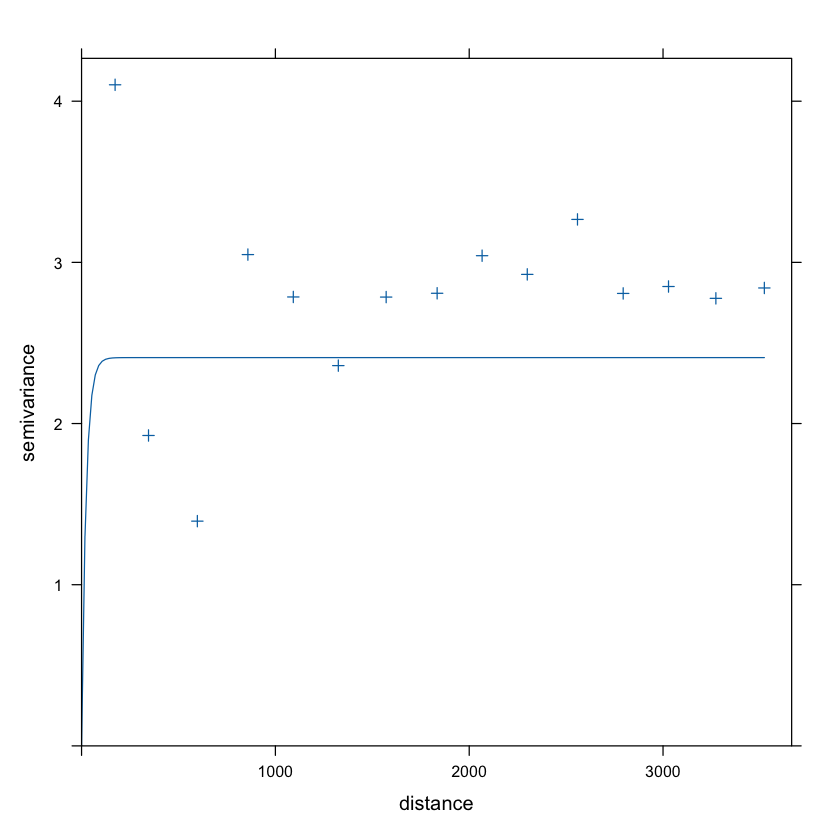

In [95]:
v.fit <- fit.variogram(v.t, vgm(3, "Exp", 1000))
plot(v.t, v.fit, pch = 3)